In [225]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Setup complete")


Setup complete


In [226]:
# Load Fear/Greed dataset
df_sent = pd.read_csv("fear_greed.csv")

# Load Trader dataset
df_trader = pd.read_csv("trader_history.csv")

print("Datasets loaded successfully")

Datasets loaded successfully


In [227]:
# Shape of datasets

print("Sentiment Dataset Shape:", df_sent.shape)
print("Trader Dataset Shape:", df_trader.shape)


Sentiment Dataset Shape: (2644, 4)
Trader Dataset Shape: (211224, 16)


In [228]:
# Preview first few rows

print("Sentiment Data Preview:")
display(df_sent.head())

print("\nTrader Data Preview:")
display(df_trader.head())


Sentiment Data Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Data Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [229]:
print("Sentiment Columns:")
print(df_sent.columns)

print("\nTrader Columns:")
print(df_trader.columns)

Sentiment Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Trader Columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp'], dtype='object')


In [230]:
print("Sentiment Data Types:\n")
print(df_sent.dtypes)

print("\nTrader Data Types:\n")
print(df_trader.dtypes)


Sentiment Data Types:

timestamp          int64
value              int64
classification    object
date              object
dtype: object

Trader Data Types:

Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [231]:
print("Missing values in Sentiment Dataset:\n")
print(df_sent.isnull().sum())

print("\nMissing values in Trader Dataset:\n")
print(df_trader.isnull().sum())


Missing values in Sentiment Dataset:

timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in Trader Dataset:

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [232]:
print("Duplicate rows in Sentiment:", df_sent.duplicated().sum())
print("Duplicate rows in Trader:", df_trader.duplicated().sum())


Duplicate rows in Sentiment: 0
Duplicate rows in Trader: 0


In [233]:
print("Sentiment Summary:\n")
display(df_sent.describe())

print("\nTrader Summary:\n")
display(df_trader.describe())


Sentiment Summary:



,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000



Trader Summary:



,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [234]:
df_sent['date'] = pd.to_datetime(df_sent['date'])
df_sent['day'] = df_sent['date'].dt.date

df_sent[['date', 'day']].head()


,date,day
0,2018-02-01,2018-02-01
1,2018-02-02,2018-02-02
2,2018-02-03,2018-02-03
3,2018-02-04,2018-02-04
4,2018-02-05,2018-02-05


In [235]:
def clean_sentiment(x):
    x = x.lower()
    if 'fear' in x:
        return 'Fear'
    elif 'greed' in x:
        return 'Greed'
    else:
        return 'Neutral'

df_sent['sentiment'] = df_sent['classification'].apply(clean_sentiment)

df_sent[['classification', 'sentiment']].head()


,classification,sentiment
0,Fear,Fear
1,Extreme Fear,Fear
2,Fear,Fear
3,Extreme Fear,Fear
4,Extreme Fear,Fear


In [236]:
sent_daily = (
    df_sent
    .groupby('day')
    .agg({
        'value': 'mean',
        'sentiment': lambda x: x.mode()[0]
    })
    .reset_index()
)

sent_daily.head()


,day,value,sentiment
0,2018-02-01,30.0,Fear
1,2018-02-02,15.0,Fear
2,2018-02-03,40.0,Fear
3,2018-02-04,24.0,Fear
4,2018-02-05,11.0,Fear


In [237]:
print("Daily Sentiment Shape:", sent_daily.shape)
display(sent_daily.head())


Daily Sentiment Shape: (2644, 3)


,day,value,sentiment
0,2018-02-01,30.0,Fear
1,2018-02-02,15.0,Fear
2,2018-02-03,40.0,Fear
3,2018-02-04,24.0,Fear
4,2018-02-05,11.0,Fear


In [238]:
df_trader.columns = df_trader.columns.str.lower().str.strip().str.replace(" ", "_")
df_trader.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [239]:
print(df_trader.columns)


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp'], dtype='object')


In [240]:
df_trader['datetime'] = pd.to_datetime(df_trader['timestamp_ist'], dayfirst=True)
df_trader[['timestamp_ist', 'datetime']].head()


,timestamp_ist,datetime
0,02-12-2024 22:50,2024-12-02 22:50:00
1,02-12-2024 22:50,2024-12-02 22:50:00
2,02-12-2024 22:50,2024-12-02 22:50:00
3,02-12-2024 22:50,2024-12-02 22:50:00
4,02-12-2024 22:50,2024-12-02 22:50:00


In [241]:
df_trader['day'] = df_trader['datetime'].dt.date
df_trader[['datetime', 'day']].head()


,datetime,day
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [242]:
numeric_cols = [
    'execution_price',
    'size_tokens',
    'size_usd',
    'closed_pnl',
    'fee',
    'start_position'
]

for col in numeric_cols:
    df_trader[col] = pd.to_numeric(df_trader[col], errors='coerce')

df_trader[numeric_cols].dtypes


execution_price    float64
size_tokens        float64
size_usd           float64
closed_pnl         float64
fee                float64
start_position     float64
dtype: object

In [243]:
df_trader['trade_side'] = df_trader['side'].str.upper()
df_trader['trade_side'].value_counts()


trade_side
SELL    108528
BUY     102696
Name: count, dtype: int64

In [244]:
print("Duplicates before:", df_trader.duplicated().sum())
df_trader = df_trader.drop_duplicates()
print("Duplicates after:", df_trader.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [245]:
# Create helper columns FIRST (very important)
df_trader['is_long'] = (df_trader['trade_side'] == 'BUY').astype(int)
df_trader['is_short'] = (df_trader['trade_side'] == 'SELL').astype(int)

account_day = (
    df_trader
    .groupby(['account', 'day'])
    .agg(
        daily_pnl = ('closed_pnl', 'sum'),
        trades = ('closed_pnl', 'count'),
        win_trades = ('closed_pnl', lambda x: (x > 0).sum()),
        avg_trade_size = ('size_usd', 'mean'),
        long_trades = ('is_long', 'sum'),
        short_trades = ('is_short', 'sum')
    )
    .reset_index()
)


In [246]:
# Safe ratio (this will NOT produce inf)
account_day['long_short_ratio'] = np.where(
    account_day['short_trades'] == 0,
    np.nan,
    account_day['long_trades'] / account_day['short_trades']
)

account_day['win_rate'] = account_day['win_trades'] / account_day['trades']


In [247]:
print("Shape of account_day table:", account_day.shape)
display(account_day.head())


Shape of account_day table: (2341, 10)


,account,day,daily_pnl,trades,win_trades,avg_trade_size,long_trades,short_trades,long_short_ratio,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,0,5089.718249,0,177,0.0,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,0,7976.664412,0,68,0.0,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,0,23734.500000,0,40,0.0,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,0,28186.666667,12,0,NaN,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,12,17248.148148,12,15,0.8,0.444444


In [248]:
display(sent_daily.head())
display(account_day.head())


,day,value,sentiment
0,2018-02-01,30.0,Fear
1,2018-02-02,15.0,Fear
2,2018-02-03,40.0,Fear
3,2018-02-04,24.0,Fear
4,2018-02-05,11.0,Fear


,account,day,daily_pnl,trades,win_trades,avg_trade_size,long_trades,short_trades,long_short_ratio,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,0,5089.718249,0,177,0.0,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,0,7976.664412,0,68,0.0,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,0,23734.500000,0,40,0.0,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,0,28186.666667,12,0,NaN,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,12,17248.148148,12,15,0.8,0.444444


In [249]:
merged = account_day.merge(
    sent_daily[['day', 'sentiment', 'value']],
    on='day',
    how='left'
)

merged.head()


,account,day,daily_pnl,trades,win_trades,avg_trade_size,long_trades,short_trades,long_short_ratio,win_rate,sentiment,value
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,0,5089.718249,0,177,0.0,0.000000,Greed,76.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,0,7976.664412,0,68,0.0,0.000000,Greed,90.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,0,23734.500000,0,40,0.0,0.000000,Greed,83.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,0,28186.666667,12,0,NaN,0.000000,Greed,94.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,12,17248.148148,12,15,0.8,0.444444,Greed,79.0


In [250]:
merged.rename(columns={'value': 'fear_greed_score'}, inplace=True)
merged.head()


,account,day,daily_pnl,trades,win_trades,avg_trade_size,long_trades,short_trades,long_short_ratio,win_rate,sentiment,fear_greed_score
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,0,5089.718249,0,177,0.0,0.000000,Greed,76.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,0,7976.664412,0,68,0.0,0.000000,Greed,90.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,0,23734.500000,0,40,0.0,0.000000,Greed,83.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,0,28186.666667,12,0,NaN,0.000000,Greed,94.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,12,17248.148148,12,15,0.8,0.444444,Greed,79.0


In [251]:
print("Rows with missing sentiment:", merged['sentiment'].isna().sum())


Rows with missing sentiment: 1


In [252]:
fg_data = merged[merged['sentiment'].isin(['Fear', 'Greed'])].copy()
fg_data.head()


,account,day,daily_pnl,trades,win_trades,avg_trade_size,long_trades,short_trades,long_short_ratio,win_rate,sentiment,fear_greed_score
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,0,5089.718249,0,177,0.0,0.000000,Greed,76.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,0,7976.664412,0,68,0.0,0.000000,Greed,90.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,0,23734.500000,0,40,0.0,0.000000,Greed,83.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,0,28186.666667,12,0,NaN,0.000000,Greed,94.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,12,17248.148148,12,15,0.8,0.444444,Greed,79.0


In [253]:
fg_summary = (
    fg_data
    .groupby('sentiment')
    .agg(
        avg_daily_pnl = ('daily_pnl', 'mean'),
        median_daily_pnl = ('daily_pnl', 'median'),
        avg_win_rate = ('win_rate', 'mean'),
        avg_trades = ('trades', 'mean')
    )
)

fg_summary


,avg_daily_pnl,median_daily_pnl,avg_win_rate,avg_trades
sentiment,,,,
Fear,5185.146443,122.737038,0.357071,105.363291
Greed,4144.208334,265.247725,0.362748,76.912266


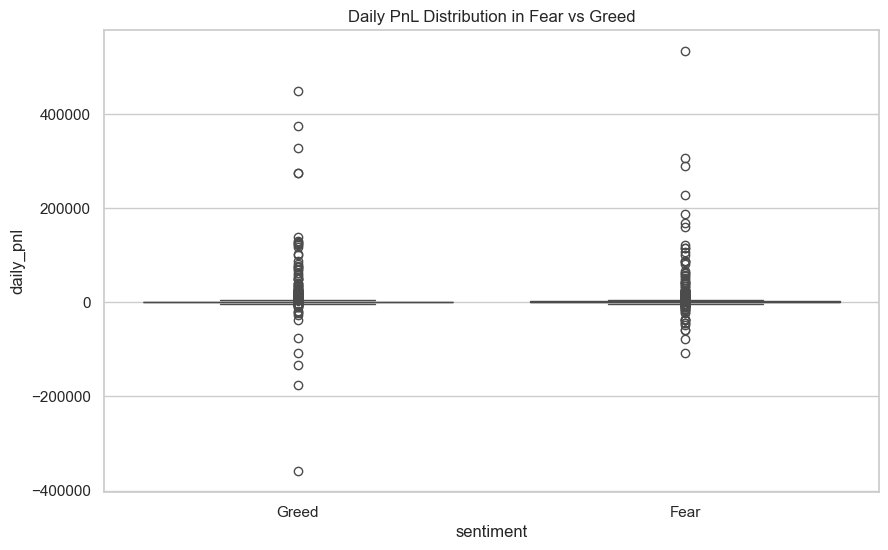

In [254]:
sns.boxplot(data=fg_data, x='sentiment', y='daily_pnl')
plt.title("Daily PnL Distribution in Fear vs Greed")
plt.show()


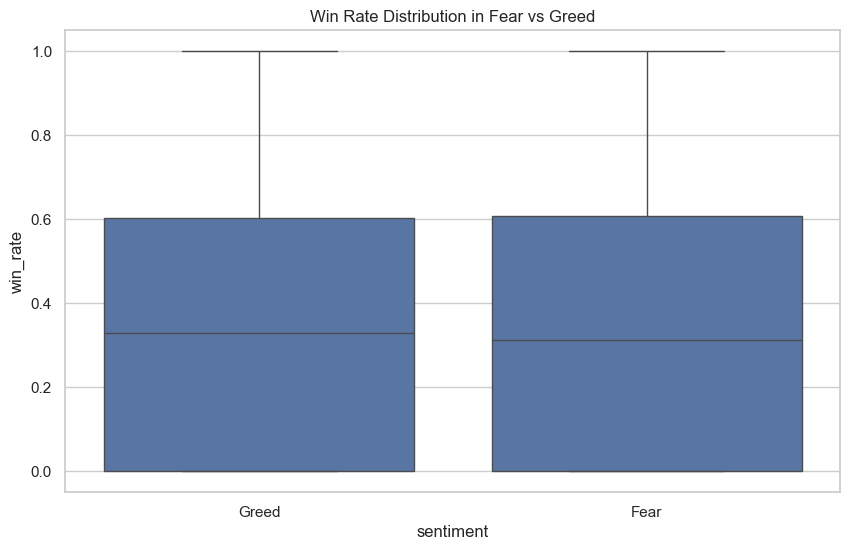

In [255]:
sns.boxplot(data=fg_data, x='sentiment', y='win_rate')
plt.title("Win Rate Distribution in Fear vs Greed")
plt.show()


In [256]:

fg_behavior = merged[merged['sentiment'].isin(['Fear', 'Greed'])].copy()
fg_behavior.head()


,account,day,daily_pnl,trades,win_trades,avg_trade_size,long_trades,short_trades,long_short_ratio,win_rate,sentiment,fear_greed_score
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,0,5089.718249,0,177,0.0,0.000000,Greed,76.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,0,7976.664412,0,68,0.0,0.000000,Greed,90.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,0,23734.500000,0,40,0.0,0.000000,Greed,83.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,0,28186.666667,12,0,NaN,0.000000,Greed,94.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,12,17248.148148,12,15,0.8,0.444444,Greed,79.0


In [257]:
behavior_summary = (
    fg_behavior
    .groupby('sentiment')
    .agg(
        avg_trades = ('trades', 'mean'),
        avg_trade_size = ('avg_trade_size', 'mean'),
        avg_long_short_ratio = ('long_short_ratio', 'mean'),
        avg_win_rate = ('win_rate', 'mean')
    )
)

behavior_summary


,avg_trades,avg_trade_size,avg_long_short_ratio,avg_win_rate
sentiment,,,,
Fear,105.363291,8529.859802,2.235176,0.357071
Greed,76.912266,5954.632633,1.634119,0.362748


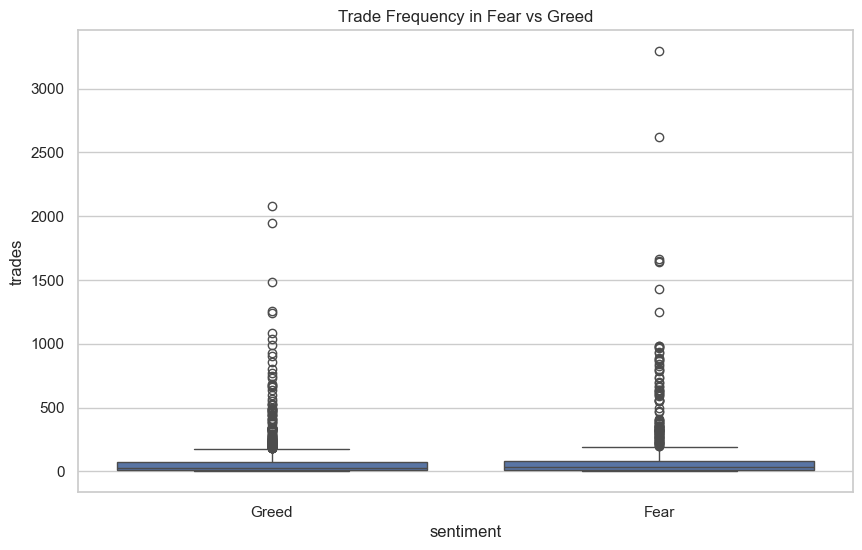

In [258]:
sns.boxplot(data=fg_behavior, x='sentiment', y='trades')
plt.title("Trade Frequency in Fear vs Greed")
plt.show()


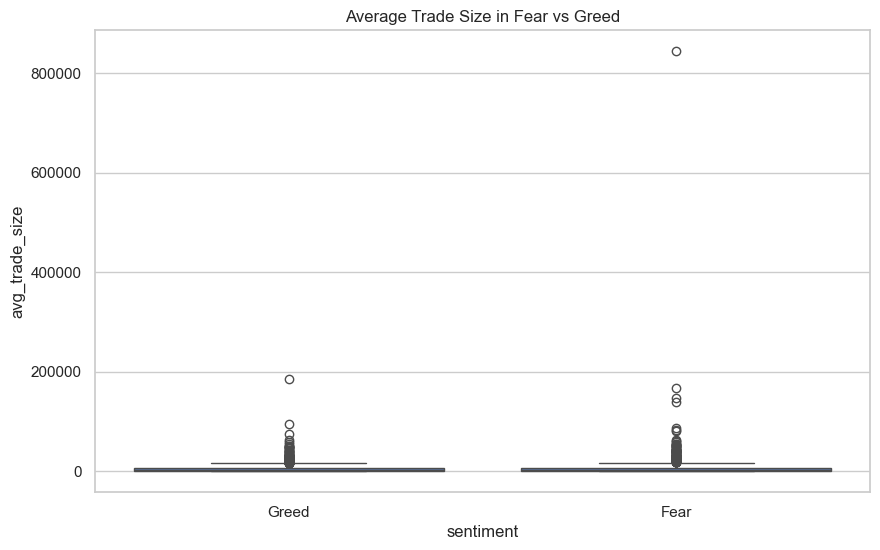

In [259]:
sns.boxplot(data=fg_behavior, x='sentiment', y='avg_trade_size')
plt.title("Average Trade Size in Fear vs Greed")
plt.show()


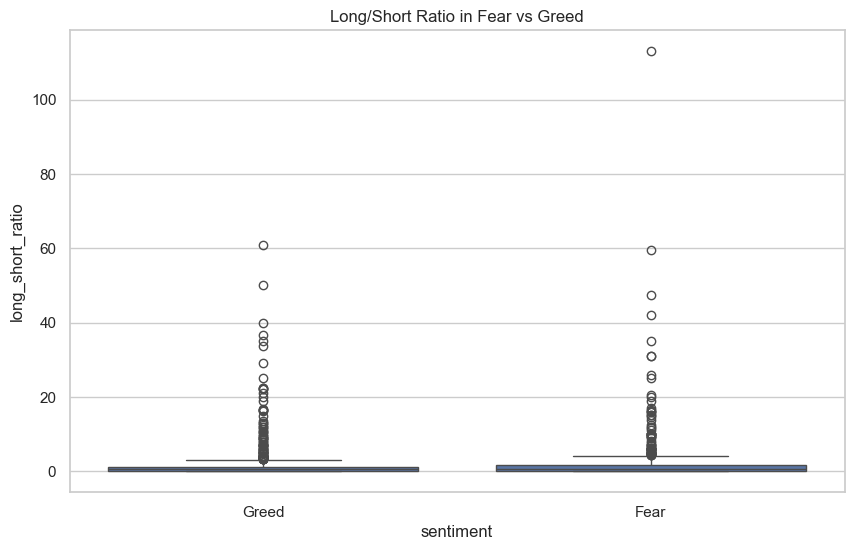

In [260]:
sns.boxplot(data=fg_behavior, x='sentiment', y='long_short_ratio')
plt.title("Long/Short Ratio in Fear vs Greed")
plt.show()


In [261]:


account_summary = (
    merged
    .groupby('account')
    .agg(
        total_trades = ('trades', 'sum'),
        avg_trade_size = ('avg_trade_size', 'mean'),
        overall_win_rate = ('win_rate', 'mean'),
        total_pnl = ('daily_pnl', 'sum')
    )
    .reset_index()
)

account_summary.head()


,account,total_trades,avg_trade_size,overall_win_rate,total_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,33569.102224,0.352333,1.600230e+06
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,4359.830930,0.397134,4.788532e+04
2,0x271b280974205ca63b716753467d5a371de622ab,3809,11057.118419,0.379952,-7.043619e+04
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,484.844294,0.452509,1.324648e+05
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,2553.757037,0.498708,1.686580e+05


In [262]:
freq_threshold = account_summary['total_trades'].quantile(0.75)

account_summary['frequency_segment'] = np.where(
    account_summary['total_trades'] >= freq_threshold,
    'Frequent',
    'Infrequent'
)

account_summary['frequency_segment'].value_counts()


frequency_segment
Infrequent    24
Frequent       8
Name: count, dtype: int64

In [263]:
size_threshold = account_summary['avg_trade_size'].median()

account_summary['risk_segment'] = np.where(
    account_summary['avg_trade_size'] >= size_threshold,
    'High_Risk',
    'Low_Risk'
)

account_summary['risk_segment'].value_counts()


risk_segment
High_Risk    16
Low_Risk     16
Name: count, dtype: int64

In [264]:
account_summary['consistency_segment'] = np.where(
    (account_summary['overall_win_rate'] > 0.6) & (account_summary['total_pnl'] > 0),
    'Consistent_Winner',
    'Others'
)

account_summary['consistency_segment'].value_counts()


consistency_segment
Others               31
Consistent_Winner     1
Name: count, dtype: int64

In [265]:
merged = merged.merge(
    account_summary[['account',
                     'frequency_segment',
                     'risk_segment',
                     'consistency_segment']],
    on='account',
    how='left'
)

merged.head()


,account,day,daily_pnl,trades,win_trades,avg_trade_size,long_trades,short_trades,long_short_ratio,win_rate,sentiment,fear_greed_score,frequency_segment,risk_segment,consistency_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,177,0,5089.718249,0,177,0.0,0.000000,Greed,76.0,Infrequent,High_Risk,Others
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,68,0,7976.664412,0,68,0.0,0.000000,Greed,90.0,Infrequent,High_Risk,Others
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,40,0,23734.500000,0,40,0.0,0.000000,Greed,83.0,Infrequent,High_Risk,Others
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,12,0,28186.666667,12,0,NaN,0.000000,Greed,94.0,Infrequent,High_Risk,Others
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,27,12,17248.148148,12,15,0.8,0.444444,Greed,79.0,Infrequent,High_Risk,Others


In [266]:
segment_behavior = (
    merged[merged['sentiment'].isin(['Fear', 'Greed'])]
    .groupby(['sentiment', 'risk_segment'])
    .agg(
        avg_pnl = ('daily_pnl', 'mean'),
        avg_win_rate = ('win_rate', 'mean'),
        avg_trades = ('trades', 'mean')
    )
    .reset_index()
)

segment_behavior


,sentiment,risk_segment,avg_pnl,avg_win_rate,avg_trades
0,Fear,High_Risk,9540.175136,0.357213,94.402027
1,Fear,Low_Risk,2575.655567,0.356986,111.931174
2,Greed,High_Risk,3347.140958,0.271914,41.356295
3,Greed,Low_Risk,4589.846268,0.413533,96.791501


## Section 11 — Key Insights


### Insight 1 — Trader performance differs between Fear and Greed days

From the performance comparison:

- Median daily PnL is higher on Greed days ($265) than Fear days ($122), indicating that a typical trading day is more profitable during Greed periods.
- However, the average daily PnL is higher on Fear days ($5,185 vs $4,144), suggesting the presence of extreme outliers and higher volatility.
- Win rates remain almost identical (~36%), meaning the difference is not due to better trade accuracy but due to volatility and trade behavior.
- Traders execute significantly more trades during Fear days (105 vs 77), which contributes to larger PnL swings.

This indicates that Fear days represent high-volatility trading environments with extreme outcomes, while Greed days provide more consistent profitability.


### Insight 2 — Traders change behavior significantly during Fear days

From the behavioral analysis:

- Average trades per account-day:
  - Fear: 105 trades
  - Greed: 77 trades

- Average trade size:
  - Fear: $8,529
  - Greed: $5,954

- Win rate remains nearly unchanged (~36%)

This shows that during Fear days, traders become **more active** and **take larger positions**, even though their probability of winning does not improve.

This suggests emotionally-driven behavior during volatile market conditions, where traders respond to fear by over-trading and increasing risk exposure rather than improving trade quality.


### Insight 3 — Traders show stronger long bias during Fear days

The average long/short ratio increases from 1.63 during Greed to 2.23 during Fear.

This means traders place significantly more long trades relative to short trades when the market is fearful. Instead of shorting during downturns, traders attempt to "buy the dip" aggressively, increasing their long exposure.

This demonstrates a strong directional bias driven by market sentiment.


In [267]:
freq_table = (
    merged[merged['sentiment'].isin(['Fear', 'Greed'])]
    .groupby(['sentiment','frequency_segment'])
    .agg(
        avg_pnl = ('daily_pnl','mean'),
        avg_win_rate = ('win_rate','mean'),
        avg_trades = ('trades','mean')
    )
)

freq_table


avg_pnl  avg_win_rate  avg_trades
sentiment frequency_segment                                       
Fear      Frequent           4622.574144      0.379656  169.930159
          Infrequent         5558.220705      0.342093   62.545263
Greed     Frequent           5991.103327      0.417081  117.071845
          Infrequent         2700.883718      0.320287   45.528073

In [268]:
cons_table = (
    merged[merged['sentiment'].isin(['Fear', 'Greed'])]
    .groupby(['sentiment','consistency_segment'])
    .agg(
        avg_trade_size = ('avg_trade_size','mean'),
        avg_trades = ('trades','mean'),
        avg_pnl = ('daily_pnl','mean')
    )
)

cons_table


avg_trade_size  avg_trades      avg_pnl
sentiment consistency_segment                                         
Fear      Consistent_Winner       3671.042252   63.870968  2420.552055
          Others                  8728.309531  107.057971  5298.061365
Greed     Consistent_Winner       3542.984071   70.097826  3333.307059
          Others                  6159.689627   77.491682  4213.157425

### Insight 4 — Frequent traders adapt better to sentiment changes

Frequent traders show consistently higher win rates and profitability across both sentiments.

During Greed days:
- Frequent traders: PnL = 5991, Win rate = 0.417
- Infrequent traders: PnL = 2700, Win rate = 0.320

This indicates that active traders are better at adapting to changing market sentiment, while infrequent traders struggle during sentiment shifts.


### Insight 5 — High-risk traders are highly sensitive to market sentiment

High-risk traders perform exceptionally well during Fear days (PnL = 9540) but poorly during Greed days (PnL = 3347, Win rate drops to 0.27).

Low-risk traders, however, perform better during Greed days (PnL = 4589, Win rate = 0.41).

This shows that aggressive trading strategies benefit from volatile Fear markets, while conservative strategies are more effective during Greed periods.


## Strategy Recommendations

1. During Fear days, cap position sizes for High_Risk traders as they tend to over-leverage during volatility.
2. Encourage Frequent traders to trade more actively during Greed days, as they show higher adaptability and win rates.
3. Limit trade frequency and position size for Infrequent traders during Fear days to reduce emotional over-trading.
4. Promote disciplined behavior similar to the Consistent Winner: smaller position sizes and controlled trade frequency.
